Simple three layer neural network (based on the book of karpathy):1 hidden layer with 3 ReLU units

                 ___Score
                /  /  |  \
               /  /   |   \
              1  n1_  n2  _n3
                 |\ \|/_\/ /|
                 | | X/ | / |
                 | \|/|\|/  |
                 1  x 1 y   1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [2]:
import math

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

#Generating random Data

In [3]:
d1 = np.random.randint(0,100, 200)
d1 = d1/np.double(10)
d2 = np.zeros(200)
for i in range(200):
    r = np.random.randint(0,50)/np.double(10)
    if i<100:
        d2[i] = d1[i]+r
    else:
        d2[i] = d1[i]-r

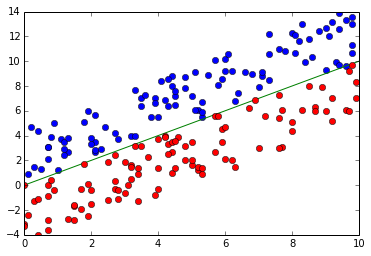

In [5]:
plt.plot(d1[:100],d2[:100],'o')
plt.plot([0,10],[0,10])
plt.plot(d1[100:],d2[100:],'ro')
l1 = np.ones(100)
l2 = -1*np.ones(100)
labels = np.hstack((l1,l2))
data = np.hstack((d1.reshape(-1,1),d2.reshape(-1,1)))
# print l÷.shape
# print d.shape

#Initializing the weights

In [9]:
a1 = np.random.rand() - 0.5
a2 = np.random.rand() - 0.5
a3 = np.random.rand() - 0.5
b1 = np.random.rand() - 0.5
b2 = np.random.rand() - 0.5
b3 = np.random.rand() - 0.5
c1 = np.random.rand() - 0.5
c2 = np.random.rand() - 0.5
c3 = np.random.rand() - 0.5
a4 = np.random.rand() - 0.5
b4 = np.random.rand() - 0.5
c4 = np.random.rand() - 0.5
d4 = np.random.rand() - 0.5

#Training

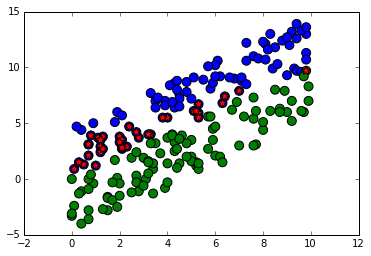

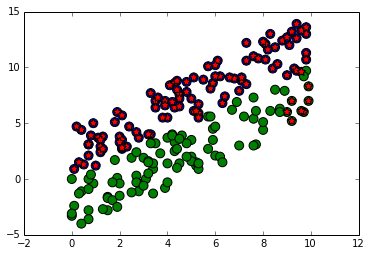

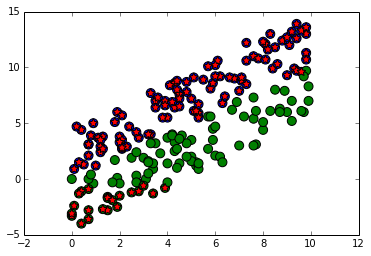

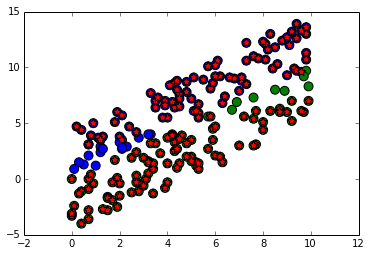

In [ ]:
for it in range(10000):
    # Show the results every 20 Iterations:
    if(it%20==0):
        mask = np.zeros(200,dtype='bool')
        for ind in range(200):
            x = data[ind,0]
            y = data[ind,1]
            l = labels[ind]

            n1 = np.max((0, a1*x + b1*y + c1) )
            n2 = np.max((0, a2*x + b2*y + c2) )
            n3 = np.max((0, a3*x + b3*y + c3) )
            score = a4*n1 + b4*n2 + c4*n3 + d4 

            if(l == 1 and score > 0):
                mask[ind]=True
            if(l == -1 and score < 0):
                mask[ind]=True
        plt.scatter(data[labels==1,0],data[labels==1,1],s=80, c='b')
        plt.scatter(data[labels==-1,0],data[labels==-1,1],s=80, c='g')
        plt.scatter(data[mask,0],data[mask,1],s=80, c='r', marker=(5, 1))
        plt.show()
        y = raw_input()
    
    #Pick a random training data
    i = np.floor(np.random.rand() * data.shape[0])
    x = data[i,0]
    y = data[i,1]
    l = labels[i]
    
    #Forward the data and calculate the score (Neurons have ReLU units! (max(0,x)) )
    n1 = np.max((0, a1*x + b1*y + c1) )
    n2 = np.max((0, a2*x + b2*y + c2) )
    n3 = np.max((0, a3*x + b3*y + c3) )
    score = a4*n1 + b4*n2 + c4*n3 + d4 
    
    
    
    #Penalize the model if the score is not as desired
    change = 0.0
    if(l == 1 and score < 1):
        change = 1
    if(l == -1 and score > -1):
        change = -1 
        
    #Calculate the derivative with respect to last layer neurons and weights connecting them to the score node
    #Note that we always in a linear combination have a fix 1 and we call its weight the bias term
    
    #Remeber: E = n1*a4+n2*b4+n3*c4+1.0*d4 
    #we want to minimize loss to be 0. weights are our parameters. So we should decrement the d(loss)/d(w) from w.
    #loss is some function that we define on E. Here we assume: d(loss)/d(E) = change (our penalty for being wrong)
    dscore = change
    #d(loss)/d(a4) =(chain rule:) d(loss)/d(E) * d(E)/d(a4) = dscore * n1
    #d(loss)/d(n1) = d(loss)/d(E) * d(E)/d(n1) = dscore * a4
    da4 = n1 * dscore #<-weight to neuron 1
    dn1 = a4 * dscore #<-neuron 1
    db4 = n2 * dscore
    dn2 = b4 * dscore
    dc4 = n3 * dscore
    dn3 = c4 * dscore
    dd4 = 1.0 * dscore #<-bias
    
    #Apply the ReLU gradient: set derivative to zero if the activation value was zero
    if  n3 == 0:
        dn3 = 0
    if  n2 == 0:
        dn2 = 0
    if  n1 == 0:
        dn1 = 0 
        
    #Calculate the derivative with respect to first layer weights
    #Remeber: n1 = a1*x + b1*y + c1*1.0 
    #We want d(loss)/d(a1) = d(loss)/d(n1) * d(n1)/d(a1) = dn1 * x
    da1 = x * dn1
    db1 = y * dn1
    dc1 = 1.0 * dn1
    
    da2 = x * dn2
    db2 = y * dn2
    dc2 = 1.0 * dn2
    
    da3 = x * dn3
    db3 = y * dn3
    dc3 = 1.0 * dn3
    
    #We don't want our weights to explode! so we assume that in our loss we also had the term a1*a1 (the L2 norm of a1)
    #Therefore we add the derivative of a1*a1 too: d(a1*a1)/d(a1) = a1 ... d(a2*a2)/d(a2) = a2
    da1 += -a1
    da2 += -a2
    da3 += -a3
    db1 += -b1
    db2 += -b2
    db3 += -b3
    da4 += -a4
    db4 += -b4
    dc4 += -c4

    #Now that all derivatives are calculated we should take a step in that direction: add the derivative to each 
    # weight
    step_size = 0.01
    a1 += step_size * da1 
    b1 += step_size * db1 
    c1 += step_size * dc1
    a2 += step_size * da2 
    b2 += step_size * db2
    c2 += step_size * dc2
    a3 += step_size * da3 
    b3 += step_size * db3 
    c3 += step_size * dc3
    a4 += step_size * da4 
    b4 += step_size * db4 
    c4 += step_size * dc4 
    d4 += step_size * dd4

#Testing the final number of correctly classified instances:

In [11]:

change = 0.0
for i in range(200):
    x = data[i,0]
    y = data[i,1]
    l = labels[i]
    
    n1 = np.max((0, a1*x + b1*y + c1) )
    n2 = np.max((0, a2*x + b2*y + c2) )
    n3 = np.max((0, a3*x + b3*y + c3) )
    score = a4*n1 + b4*n2 + c4*n3 + d4 
    
    if(l == 1 and score > 0):
        change += 1
    if(l == -1 and score < 0):
        change += 1 
print change

178.0
